<a href="https://colab.research.google.com/github/dddrra/Taller_3_p2/blob/main/pycaret_optuna_mlflow__Taller3_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
!pip install optuna
!pip install mlflow
import optuna
import mlflow
import pandas as pd
import mlflow.sklearn
import optuna.visualization as vis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mlflow.models.signature import infer_signature



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 18.2 MB/s eta 0:00:00


In [3]:
data = pd.read_csv('/content/drive/MyDrive/TALLER_3_MLOps/Student_Performance.csv')

In [4]:
data

,Unnamed: 0,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0,7,99,Yes,9,1,91.0
1,1,4,82,No,4,2,65.0
2,2,8,51,Yes,7,2,45.0
3,3,5,52,Yes,5,2,36.0
4,4,7,75,No,8,5,66.0
...,...,...,...,...,...,...,...
9995,9995,1,49,Yes,4,2,23.0
9996,9996,7,64,Yes,8,5,58.0
9997,9997,6,83,Yes,8,5,74.0
9998,9998,9,97,Yes,7,0,95.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   Hours Studied                     10000 non-null  int64  
 2   Previous Scores                   10000 non-null  int64  
 3   Extracurricular Activities        10000 non-null  object 
 4   Sleep Hours                       10000 non-null  int64  
 5   Sample Question Papers Practiced  10000 non-null  int64  
 6   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


In [10]:
data.describe()

,Unnamed: 0,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4.992900,69.445700,6.530600,4.583300,55.224800,0.494800
std,2886.89568,2.589309,17.343152,1.695863,2.867348,19.212558,0.499998
min,0.00000,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000
25%,2499.75000,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000
50%,4999.50000,5.000000,69.000000,7.000000,5.000000,55.000000,0.000000
75%,7499.25000,7.000000,85.000000,8.000000,7.000000,71.000000,1.000000
max,9999.00000,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000


In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
Hours Studied,0
Previous Scores,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0
Extracurricular Activities_Yes,0


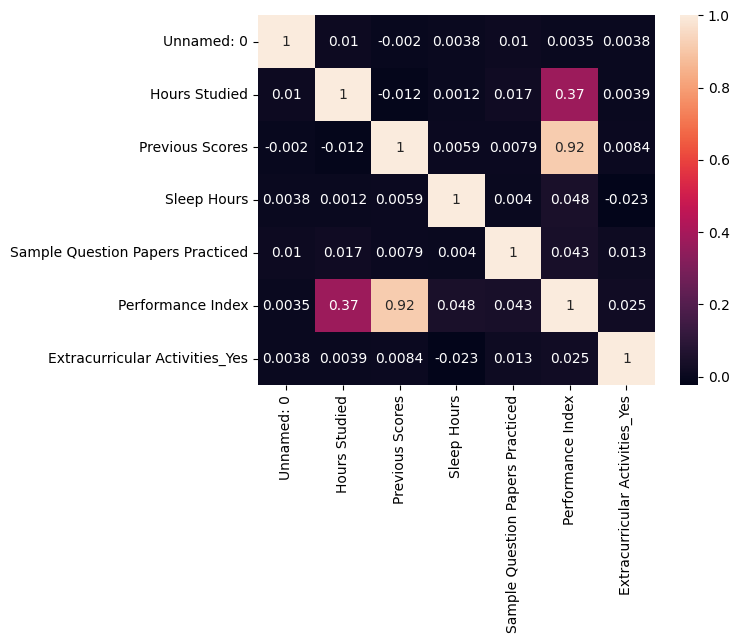

In [13]:
#busco correlaciones entre tosdas las cols y las pongo en matriz con heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 67.8 MB/s eta 0:00:00
   ━━━

ImportError: cannot import name 'threadpool_info' from 'sklearn.utils.fixes' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/fixes.py)

In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/TALLER_3_MLOps/Student_Performance.csv')

In [5]:
import os
!pip install optuna
!pip install mlflow
import optuna
import mlflow
import pandas as pd
import mlflow.sklearn
import optuna.visualization as vis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mlflow.models.signature import infer_signature

encoder = OneHotEncoder(drop='first')
encoder.fit(data[['Extracurricular Activities']])
data[encoder.get_feature_names_out()] = encoder.transform(data[['Extracurricular Activities']]).toarray()
data.drop(['Extracurricular Activities'], axis=1, inplace=True)
!pip install -U kaleido
import kaleido
scaler = StandardScaler()
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from pycaret.regression import *
regressor = setup(data, target='Performance Index', session_id=123, preprocess=False)

,Description,Value
0,Session id,123
1,Target,Performance Index
2,Target type,Regression
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(10000, 7)"
5,Transformed train set shape,"(7000, 7)"
6,Transformed test set shape,"(3000, 7)"
7,Numeric features,6


In [7]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.6061,4.0933,2.0222,0.9889,0.0463,0.0344,0.4490
ridge,Ridge Regression,1.6061,4.0933,2.0222,0.9889,0.0463,0.0344,0.0300
lar,Least Angle Regression,1.6073,4.0977,2.0233,0.9889,0.0462,0.0344,0.0320
br,Bayesian Ridge,1.6061,4.0933,2.0222,0.9889,0.0463,0.0344,0.0310
lightgbm,Light Gradient Boosting Machine,1.6884,4.5025,2.1210,0.9878,0.0487,0.0362,0.6060
gbr,Gradient Boosting Regressor,1.6780,4.4746,2.1147,0.9878,0.0483,0.0360,0.4840
lasso,Lasso Regression,1.7374,4.7799,2.1853,0.9870,0.0507,0.0376,0.0180
llar,Lasso Least Angle Regression,1.7374,4.7799,2.1853,0.9870,0.0507,0.0376,0.0310
en,Elastic Net,1.7426,4.8141,2.1932,0.9869,0.0513,0.0378,0.0300
xgboost,Extreme Gradient Boosting,1.7988,5.1298,2.2636,0.9861,0.0521,0.0385,0.1800


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

EL MEJOR MODELO QUE ES CONO EL QUE SE VA A TRABAJAR ES REGRESIÓN LINEAL PERO DA CASI IGUAL A OTROS Y COMO SE OPTIMIZARÁ CON OPTUNA, SE USARÁ UNO DISTINTO PARA QUE SEA MÁS UTIL OPTUNA Y HAYA MÁS PARÁMETROS

In [18]:
# !pip install optuna
# !pip install mlflow
import mlflow
import mlflow.sklearn
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
import optuna.visualization as vis  # Esto es para visualización de Optuna
from mlflow.models.signature import infer_signature


scaler = StandardScaler()
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlflow.set_experiment("Taller3 p2 Mlflow-Optuna Student Performance")

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)

    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5

    run_name = f"Iteration {trial.number + 1}"
    with mlflow.start_run(nested=True, run_name=run_name):
        mlflow.log_param("alpha", alpha)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("rmse", rmse)

    return r2


study = optuna.create_study(direction='maximize')

with mlflow.start_run(run_name="optuna_studentP_ridge"):
    study.optimize(objective, n_trials=10)

    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_r2", study.best_value)
    best_params = study.best_params
    final_model = Ridge(alpha=best_params['alpha'])
    final_model.fit(X_train, y_train)

    y_pred_final = final_model.predict(X_test)

    final_r2 = r2_score(y_test, y_pred_final)
    final_mae = mean_absolute_error(y_test, y_pred_final)
    final_rmse = mean_squared_error(y_test, y_pred_final)**0.5

    mlflow.log_metric("final_r2", final_r2)
    mlflow.log_metric("final_mae", final_mae)
    mlflow.log_metric("final_rmse", final_rmse)

    input_example = pd.DataFrame(X_train[:1], columns=data.drop('Performance Index', axis=1).columns)
    signature = infer_signature(X_train, final_model.predict(X_train))

    mlflow.sklearn.log_model(
        sk_model=final_model,
        artifact_path="model_student_performance_ridge",
        input_example=input_example,
        signature=signature
    )

    #reemplazo por html
    opt_history_path = "optimization_history.html"
    opt_slice_path = "slice_plot.html"

    vis.plot_optimization_history(study).write_html(opt_history_path)
    vis.plot_slice(study).write_html(opt_slice_path)

    mlflow.log_artifact(opt_history_path)
    mlflow.log_artifact(opt_slice_path)

    os.system(f"rm *.html")

print("Best params:")
print(study.best_params)


[I 2024-12-01 22:37:02,531] A new study created in memory with name: no-name-342ef300-307d-4a05-98f1-652e633a3a57
[I 2024-12-01 22:37:02,720] Trial 0 finished with value: 0.9889836314288507 and parameters: {'alpha': 0.0902198863095239}. Best is trial 0 with value: 0.9889836314288507.
[I 2024-12-01 22:37:02,844] Trial 1 finished with value: 0.988966079496028 and parameters: {'alpha': 10.27792666002656}. Best is trial 0 with value: 0.9889836314288507.
[I 2024-12-01 22:37:02,933] Trial 2 finished with value: 0.9889837639594571 and parameters: {'alpha': 0.005607532522210338}. Best is trial 2 with value: 0.9889837639594571.
[I 2024-12-01 22:37:03,055] Trial 3 finished with value: 0.9887842579804857 and parameters: {'alpha': 74.42465384073365}. Best is trial 2 with value: 0.9889837639594571.
[I 2024-12-01 22:37:03,114] Trial 4 finished with value: 0.9889176149773892 and parameters: {'alpha': 32.22245601314377}. Best is trial 2 with value: 0.9889837639594571.
[I 2024-12-01 22:37:03,197] Trial

Best params:
{'alpha': 1.0441791259927514e-05}


In [19]:
!pip freeze > requirements.txt
